In [ ]:
!pip install GetOldTweets3

In [ ]:
import GetOldTweets3 as got3
import GetOldTweets3
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import tensorflow as tf
import time

# **GetOldTweets3 Exploration**

In [ ]:
import GetOldTweets3 as got


usernames = ['joebiden', 'realdonaldtrump']
keyword = 'donald'
def download_tweets(username, keyword):
    #print(f"Downloading for {username}, {keyword}")
    tweetCriteria = got.manager.TweetCriteria().setUsername(username)\
                                               .setQuerySearch(keyword)\
                                               .setMaxTweets(100)\
                                               .setSince("2019-01-01")\
                                               .setUntil("2019-06-01")\
                                               #.setLang(language)

    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    df = pd.DataFrame([tweet.__dict__ for tweet in tweets])
    #print(df.shape)
    df.to_csv(f"/content/drive/My Drive/tests/tweets{username}{keyword}.csv", index=False)
    
for username in usernames:
    download_tweets(username, keyword)

# **Structured data exploration**

In [ ]:
data = pd.read_csv('tweets_on_ms.csv')
data.head()

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,2020-03-25 23:56:40,TrplCrownChaser,MorganStanley,0,0,0,@MorganStanley you might want to quit promotin...,NaN,@MorganStanley,NaN,1242963642410323971,https://twitter.com/TrplCrownChaser/status/124...
1,2020-03-25 23:23:05,qslzpidbenams,NaN,1,0,0,"Of course, in the end, be wary of the Chinese ...",NaN,NaN,NaN,1242955191286149125,https://twitter.com/qslzpidbenams/status/12429...
2,2020-03-25 23:21:04,qslzpidbenams,NaN,1,0,0,"Then, continue to decouple. If you don't know ...",NaN,NaN,NaN,1242954682751950850,https://twitter.com/qslzpidbenams/status/12429...
3,2020-03-25 23:19:19,qslzpidbenams,NaN,1,0,0,"Now, the CCP's internal factions are making so...",NaN,NaN,NaN,1242954244816351234,https://twitter.com/qslzpidbenams/status/12429...
4,2020-03-25 23:19:13,HerbChap_,Bloch_R,0,0,0,NaN,NaN,NaN,NaN,1242954220241903618,https://twitter.com/HerbChap_/status/124295422...


In [ ]:
unique_hashtags_values = pd.value_counts(data['hashtags'])
unique_hashtags_df = pd.DataFrame({'hashtag' :unique_hashtags_values.index, 'number' : unique_hashtags_values.values }, index = np.arange(unique_hashtags_values.shape[0]))
unique_hashtags_df.head(10)

,hashtag,number
0,#ProtectTheArctic,342
1,#MorganStanley,103
2,#MorganStanley #stockmarket #stock #technicala...,89
3,#ALERT,50
4,#BrokerageRadar,44
5,#DMGalaAwardsFeb2020,33
6,#coronavirus,33
7,#iFunny,29
8,#Kashmiris #KashmirReferendum,28
9,#NEWS #ALERT #PROJECT #NEWS #PENDING,25


In [ ]:
unique_users_values = pd.value_counts(data['username'])
unique_users_df = pd.DataFrame({'user' :unique_users_values.index, 'number' : unique_users_values.values }, index = np.arange(unique_users_values.shape[0]))
unique_users_df.head(10)

,user,number
0,Chrisgebb,869
1,infoguy411,542
2,qslzpidbenams,526
3,kuma_meow,384
4,MorganStanley,287
5,daviddo43706820,182
6,consensomercado,123
7,acemaxx,114
8,Tickeron,89
9,TweeterTrash,85


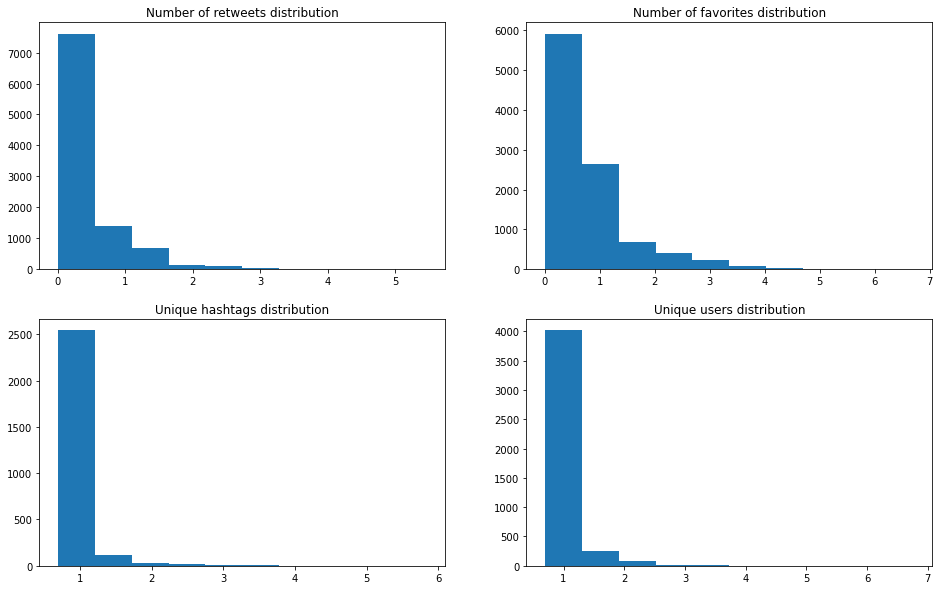

In [ ]:
plt.figure(figsize = (16,10))
plt.subplot(2,2,1)
plt.hist(np.log(1+ data['retweets']))
plt.title('Number of retweets distribution')
plt.subplot(2,2,2)
plt.hist(np.log(1+ data['favorites']))
plt.title('Number of favorites distribution')
plt.subplot(2,2,3)
plt.hist(np.log(1+unique_hashtags_df['number']))
plt.title('Unique hashtags distribution')
plt.subplot(2,2,4)
plt.hist(np.log(1+unique_users_df['number']))
plt.title('Unique users distribution')
plt.show()

In [ ]:
tweets = data['text'].dropna().values
tweets[:3]

array(['@MorganStanley you might want to quit promoting REALLY OLD GUIDANCE that’s worthless in the last two weeks.',
       "Of course, in the end, be wary of the Chinese Communist Party and Chinese scammers. Don't believe them. Decoupling will make CCP and China attack each other.",
       "Then, continue to decouple. If you don't know the CCP's various trick, you must be very careful about their false goodwill. Also, it is best to strictly check various medical products from China. The quality of these goods is not guaranteed!"],
      dtype=object)

In [ ]:
def preprocess(s) :
  s = re.sub(r"[@]+", "", s).strip() # remove @
  s = re.sub('#', '', s) #remove #
  s = re.sub('RT[\s]+', '', s) #remove RT
  return s


In [ ]:
tweets_preprocessed = []
for i in range(len(tweets)):
   tweets_preprocessed.append(preprocess(tweets[i]))
   
tweets_preprocessed[:3]

['MorganStanley you might want to quit promoting REALLY OLD GUIDANCE that’s worthless in the last two weeks.',
 "Of course, in the end, be wary of the Chinese Communist Party and Chinese scammers. Don't believe them. Decoupling will make CCP and China attack each other.",
 "Then, continue to decouple. If you don't know the CCP's various trick, you must be very careful about their false goodwill. Also, it is best to strictly check various medical products from China. The quality of these goods is not guaranteed!"]

# **1. Sentiment analysis using pretrained models on raw data**

## **1.1 Vader from NLKT**

In [ ]:
# pretrained sentiment analysis

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
sid = SentimentIntensityAnalyzer()

In [ ]:
start = time.time()

summary = {"positive":0,"neutral":0,"negative":0}
scores_vader = []

for x in tweets_preprocessed: 
    score = sid.polarity_scores(x)
    scores_vader.append(score)
    if score["compound"] > 0.1:
        summary["positive"] +=1
    elif score["compound"] < -0.1:
        summary["negative"] +=1
    else : 
      summary['neutral'] +=1

print('Time taken to classify 10,000 tweets : {} sec\n'.format(time.time() - start))


Time taken to classify 10,000 tweets : 2.7951695919036865 sec



In [ ]:
print(summary)
s = [summary['negative'], summary['neutral'],summary['positive']]

{'negative': 2308, 'neutral': 3366, 'positive': 4120}

<function matplotlib.pyplot.show>

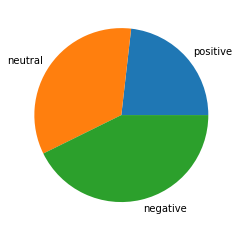

In [ ]:
plt.pie(s, labels = ['positive', 'neutral', 'negative'])
plt.show

In [ ]:
scores_vader[:10]

[{'compound': -0.0258, 'neg': 0.14, 'neu': 0.676, 'pos': 0.184},
 {'compound': -0.1027, 'neg': 0.101, 'neu': 0.812, 'pos': 0.088},
 {'compound': 0.7339, 'neg': 0.026, 'neu': 0.834, 'pos': 0.14},
 {'compound': -0.1027, 'neg': 0.137, 'neu': 0.753, 'pos': 0.11},
 {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.5574, 'neg': 0.0, 'neu': 0.685, 'pos': 0.315},
 {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': -0.6908, 'neg': 0.241, 'neu': 0.759, 'pos': 0.0},
 {'compound': 0.7297, 'neg': 0.076, 'neu': 0.704, 'pos': 0.22},
 {'compound': 0.2951, 'neg': 0.154, 'neu': 0.669, 'pos': 0.177}]

In [ ]:
scores_vader_df = pd.DataFrame(scores_vader)
scores_vader_df.head(8)

,neg,neu,pos,compound
0,0.140,0.676,0.184,-0.0258
1,0.101,0.812,0.088,-0.1027
2,0.026,0.834,0.140,0.7339
3,0.137,0.753,0.110,-0.1027
4,0.000,1.000,0.000,0.0000
5,0.000,0.685,0.315,0.5574
6,0.000,1.000,0.000,0.0000
7,0.241,0.759,0.000,-0.6908


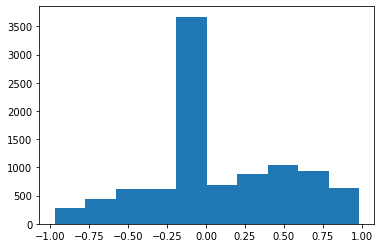

In [ ]:
plt.hist(scores_vader_df['compound'])
plt.show()

## **1.2 TextBlob**

The sentiment property returns a namedtuple of the form **Sentiment(polarity, subjectivity)**. The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.



In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
textblob_df = pd.DataFrame(data = {'Tweet' : tweets_preprocessed})

In [ ]:
def TextBlob_Analaysis(tweet) : 
  subjectivity = TextBlob(tweet).sentiment.subjectivity
  polarity = TextBlob(tweet).sentiment.polarity
  return subjectivity, polarity

TextBlob_Analaysis(tweets_preprocessed[0])

(0.3888888888888889, -0.23333333333333336)

In [ ]:
textblob_df['Subjectivity'] = textblob_df['Tweet'].apply(lambda x : TextBlob_Analaysis(x)[0])
textblob_df['Polarity'] = textblob_df['Tweet'].apply(lambda x : TextBlob_Analaysis(x)[1])

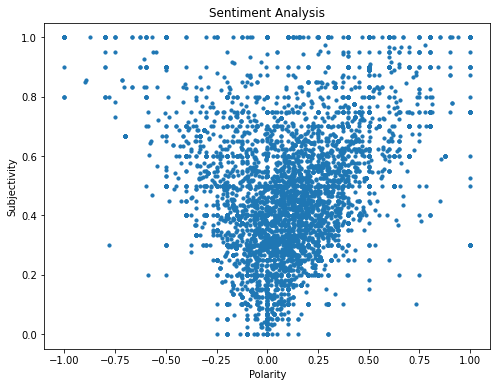

In [ ]:
# plot subjectivity vs polarity 
plt.figure(figsize=(8,6)) 
plt.scatter(textblob_df["Polarity"], textblob_df["Subjectivity"], s = 10) 
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [ ]:
def Classify(score, treshold) : 
  if score > treshold : 
    return 'Positive'
  elif score < -treshold : 
    return 'Negative'
  else : 
    return 'Neutral'

In [ ]:
textblob_df['Sentiment'] = textblob_df['Polarity'].apply(lambda x : Classify(x, 0.1))

In [ ]:
textblob_df.head(3)

,Tweet,Subjectivity,Polarity,Sentiment
0,MorganStanley you might want to quit promoting...,0.388889,-0.233333,Negative
1,"Of course, in the end, be wary of the Chinese ...",0.268750,-0.156250,Negative
2,"Then, continue to decouple. If you don't know ...",0.483333,0.078333,Neutral


In [ ]:
pd.value_counts(textblob_df['Sentiment'])

Neutral     5753
Positive    2996
Negative    1045
Name: Sentiment, dtype: int64

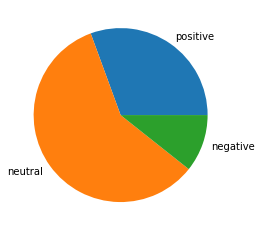

In [ ]:
plt.pie([2996,5753,1045], labels = ['positive', 'neutral', 'negative'])
plt.show()

## **1.3 Flair**

In [ ]:
#!pip3 install flair
import flair
from flair.models import TextClassifier
from flair.data import Sentence

In [ ]:
flair_sentiment = TextClassifier.load('en-sentiment')

2020-06-09 13:16:51,810 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert.pt not found in cache, downloading to /tmp/tmp72rwu33s


100%|██████████| 266170364/266170364 [00:26<00:00, 10090368.25B/s]

2020-06-09 13:17:18,569 copying /tmp/tmp72rwu33s to cache at /root/.flair/models/sentiment-en-mix-distillbert.pt


2020-06-09 13:17:19,144 removing temp file /tmp/tmp72rwu33s
2020-06-09 13:17:19,375 loading file /root/.flair/models/sentiment-en-mix-distillbert.pt


In [ ]:
start = time.time()
scores_flair = []
for x in tweets_preprocessed : 
  s = Sentence(x)
  flair_sentiment.predict(s)
  general_sentiment = s.labels
  scores_flair.append(general_sentiment)

print('Time taken to classify 10,000 tweets : {} sec\n'.format(time.time() - start))


2020-06-09 13:17:25,020 ACHTUNG: An empty Sentence was created! Are there empty strings in your dataset?
2020-06-09 13:18:35,813 ACHTUNG: An empty Sentence was created! Are there empty strings in your dataset?
2020-06-09 13:18:53,707 ACHTUNG: An empty Sentence was created! Are there empty strings in your dataset?
2020-06-09 13:19:11,574 ACHTUNG: An empty Sentence was created! Are there empty strings in your dataset?
2020-06-09 13:19:14,170 ACHTUNG: An empty Sentence was created! Are there empty strings in your dataset?
2020-06-09 13:19:19,961 ACHTUNG: An empty Sentence was created! Are there empty strings in your dataset?
2020-06-09 13:19:22,548 ACHTUNG: An empty Sentence was created! Are there empty strings in your dataset?
2020-06-09 13:19:37,027 ACHTUNG: An empty Sentence was created! Are there empty strings in your dataset?
2020-06-09 13:20:12,973 ACHTUNG: An empty Sentence was created! Are there empty strings in your dataset?
2020-06-09 13:20:16,902 ACHTUNG: An empty Sentence was 

In [ ]:
scores_flair[:6]

[[NEGATIVE (0.9999)],
 [NEGATIVE (0.9988)],
 [NEGATIVE (1.0)],
 [NEGATIVE (0.9993)],
 [NEGATIVE (0.6767)],
 [NEGATIVE (0.9427)]]

In [ ]:
a = np.array(scores_flair)
scores_string = []
for i in range(len(a)) :
  scores_string.append(str(a[i])) 


In [ ]:
scores_string[:6]

['[NEGATIVE (0.9999)]',
 '[NEGATIVE (0.9988)]',
 '[NEGATIVE (1.0)]',
 '[NEGATIVE (0.9993)]',
 '[NEGATIVE (0.6767)]',
 '[NEGATIVE (0.9427)]']

In [ ]:
Positive_indices = []
Positive_scores = []
Negative_indices =[]
Negative_scores = [] 
for i in range(len(scores_string)) :
  if re.match('\\[N', scores_string[i]):
    k = re.sub(r'[\[NEGATIVE (]', "",scores_string[i]).strip()
    k = re.sub(r'\)]$', '', k).strip()
    Negative_indices.append(i)
    Negative_scores.append(float(k))

  if re.match('\\[P', scores_string[i]):
    k = re.sub(r'[\[POSITIVE (]', "",scores_string[i]).strip()
    k = re.sub(r'\)]$', '', k).strip()
    Positive_indices.append(i)
    Positive_scores.append(float(k))


In [ ]:
print(len(Positive_scores))
print(len(Negative_scores))

4711
5047


In [ ]:
Sentiment_score = []
Sentiment_index = []
Sentiment_type = []

for i in range(len(Positive_scores)): 
  Sentiment_index.append(Positive_indices[i])
  Sentiment_score.append(Positive_scores[i])
  if Positive_scores[i]>0.95 : 
    Sentiment_type.append('Positive')
  else : 
    Sentiment_type.append('Neutral')

for i in range(len(Negative_scores)): 
  Sentiment_score.append(- Negative_scores[i])
  Sentiment_index.append(Negative_indices[i])
  if Negative_scores[i]>0.95 : 
    Sentiment_type.append('Negative')
  else : 
    Sentiment_type.append('Neutral')

In [ ]:
Sentiment_analysis = pd.DataFrame({'Type': Sentiment_type, 'Score' : Sentiment_score}, index = Sentiment_index).sort_index()

In [ ]:
Sentiment_analysis.head(3)

,Type,Score
0,Negative,-0.9999
1,Negative,-0.9988
2,Negative,-1.0000


In [ ]:
proportions = pd.value_counts(Sentiment_analysis['Type'])
proportions

Neutral     3585
Negative    3411
Positive    2762
Name: Type, dtype: int64

<function matplotlib.pyplot.show>

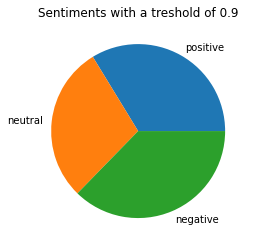

In [ ]:
s2 = [3291, 2828, 3639]
plt.pie(s2, labels = ['positive', 'neutral', 'negative'])
plt.title('Sentiments with a treshold of 0.9')
plt.show

## **1.4 Comparison of the libraries**

In [ ]:
def assign_binary(sentiment) : 
  if sentiment == 'Positive': 
    return 1
  elif sentiment == 'Negative' :
    return -1
  else : 
    return 0

In [ ]:
# comparison of the results

comparative_df = pd.DataFrame(data = {'Tweet' : tweets_preprocessed})
comparative_df['Textblob Score'] = textblob_df['Polarity']
comparative_df['Textblob Sentiment'] = textblob_df['Sentiment']

comparative_df['NLTK Score'] = scores_vader_df['compound']
comparative_df['NLTK Sentiment'] = scores_vader_df['compound'].apply(lambda x : Classify(x,0.2))

comparative_df['Flair Score'] = Sentiment_analysis['Score']
comparative_df['Flair Sentiment'] = Sentiment_analysis['Type']

comparative_df['Textblob'] = comparative_df['Textblob Sentiment'].apply(lambda x :assign_binary(x))
comparative_df['NLTK'] = comparative_df['NLTK Sentiment'].apply(lambda x :assign_binary(x))
comparative_df['Flair'] = comparative_df['Flair Sentiment'].apply(lambda x :assign_binary(x))



In [ ]:
comparative_df.head()

,Tweet,Textblob Score,Textblob Sentiment,NLTK Score,NLTK Sentiment,Flair Score,Flair Sentiment,Textblob,NLTK,Flair
0,MorganStanley you might want to quit promoting...,-0.233333,Negative,-0.0258,Neutral,-0.9999,Negative,-1,0,-1
1,"Of course, in the end, be wary of the Chinese ...",-0.156250,Negative,-0.1027,Neutral,-0.9988,Negative,-1,0,-1
2,"Then, continue to decouple. If you don't know ...",0.078333,Neutral,0.7339,Positive,-1.0000,Negative,0,1,-1
3,"Now, the CCP's internal factions are making so...",-0.023810,Neutral,-0.1027,Neutral,-0.9993,Negative,0,0,-1
4,"According to MorganStanley, an historic initia...",0.000000,Neutral,0.0000,Neutral,-0.6767,Neutral,0,0,0


In [ ]:
# unique values 
s1 = pd.value_counts(comparative_df['Textblob']).sort_index().values
s2 = pd.value_counts(comparative_df['NLTK']).sort_index().values
s3 = pd.value_counts(comparative_df['Flair']).sort_index().values

unique_summary = pd.DataFrame({'Textblob' :s1,'NLTK': s2,'Flair' : s3}, index = [-1,0,1])
unique_summary.head()

,Textblob,NLTK,Flair
-1,1045,2098,3411
0,5753,4100,3621
1,2996,3596,2762


In [ ]:
groups = comparative_df.groupby(['Textblob', 'NLTK', 'Flair']).count()['Tweet']

In [ ]:
groups

Textblob  NLTK  Flair
-1        -1    -1        426
                 0        128
                 1         23
           0    -1        170
                 0         95
                 1         36
           1    -1         82
                 0         54
                 1         31
 0        -1    -1        748
                 0        308
                 1         95
           0    -1        787
                 0       1385
                 1       1018
           1    -1        390
                 0        541
                 1        481
 1        -1    -1        220
                 0        118
                 1         32
           0    -1        190
                 0        290
                 1        129
           1    -1        398
                 0        702
                 1        917
Name: Tweet, dtype: int64

In [ ]:
nltk_vs_textblob = comparative_df.groupby(['Textblob', 'NLTK']).count()['Tweet']
nltk_vs_textblob = pd.DataFrame(nltk_vs_textblob).unstack()
nltk_vs_textblob

Tweet            
NLTK        -1     0     1
Textblob                  
-1         577   301   167
 0        1151  3190  1412
 1         370   609  2017

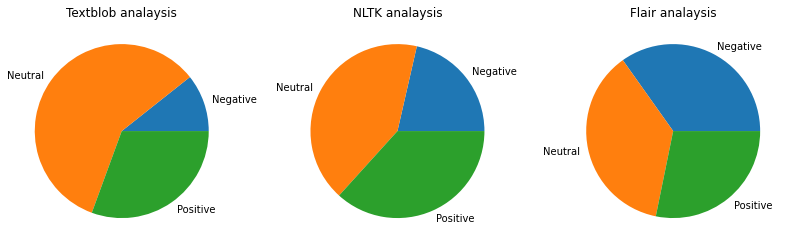

In [ ]:
figure = plt.figure(figsize = (14,4))
plt.subplot(1,3,1)
plt.pie(unique_summary['Textblob'], labels = ['Negative', 'Neutral', 'Positive'])
plt.title('Textblob analaysis')
plt.subplot(1,3,2)
plt.pie(unique_summary['NLTK'], labels = ['Negative', 'Neutral', 'Positive'])
plt.title('NLTK analaysis')
plt.subplot(1,3,3)
plt.pie(unique_summary['Flair'], labels = ['Negative', 'Neutral', 'Positive'])
plt.title('Flair analaysis')
plt.show()

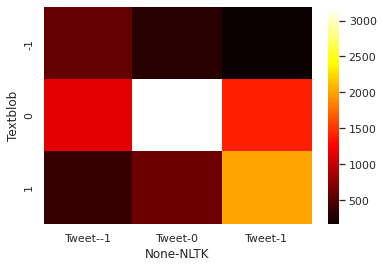

In [ ]:
import seaborn as sbn
sbn.heatmap(nltk_vs_textblob, cmap = 'hot')

# most of the neutral tweets are classified as neutral by the different libraries, they don't agree on some extreme cases

## **2. Preprocess for better results**

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords") 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def preprocess_tweets(tweets) : 
  filtered = []
  preprocessed_tweets = []
  for tweet in tweets : 
    if re.match('^.*(MorganStanley|morganstanley|bank|transaction|finance).*$', tweet):
      split = tweet.split(' ')
      filtered.append([word for word in split if word not in stopwords.words('english')])

  for word_list in filtered : 
    v = ''
    for i in range (len(word_list)) : 
      v = v + ' ' + word_list[i]
    preprocessed_tweets.append(v)

  return preprocessed_tweets


In [ ]:
### TESTING PIECES OF CODE ####

print('SPLIT INTO WOEDS AND REMOVE STOPWORDS')
print()
split_tweets= []
for tweet in tweets_preprocessed[:1] : 
  split_tweets.append(tweet.split(' '))

filtered_words = []
for tweet in split_tweets : 
  filtered_words.append([word for word in tweet if word not in stopwords.words('english')])

print('split : ', split_tweets)
print('filtrered : ', filtered_words)
print('---------------------------------------------------------------------------------------------')

print()
print('SELECT ONLY RELEVANT TWEETS AND REMOVE STOPWORDS')
print()
filtered = []
for tweets in tweets_preprocessed[:2] : 
  if re.match('^.*(MorganStanley|morganstanley|bank|transaction|finance).*$', tweets):
    split = tweets.split(' ')
    filtered.append([word for word in split if word not in stopwords.words('english')])

print('relevant tweets filtered : ', filtered)
print('number of remaining tweets : ', len(filtered))

print('---------------------------------------------------------------------------------------------')
print()
print('REBUILD A STRING FROM REMAINING WORDS')
print()

filtered_tweets = []

for word_list in filtered : 
  v = ''
  for i in range (len(word_list)) : 
    v = v + ' ' + word_list[i]
  filtered_tweets.append(v)
print(filtered_tweets)
print('---------------------------------------------------------------------------------------------')


SPLIT INTO WOEDS AND REMOVE STOPWORDS

split :  [['MorganStanley', 'you', 'might', 'want', 'to', 'quit', 'promoting', 'REALLY', 'OLD', 'GUIDANCE', 'that’s', 'worthless', 'in', 'the', 'last', 'two', 'weeks.']]
filtrered :  [['MorganStanley', 'might', 'want', 'quit', 'promoting', 'REALLY', 'OLD', 'GUIDANCE', 'that’s', 'worthless', 'last', 'two', 'weeks.']]
---------------------------------------------------------------------------------------------

SELECT ONLY RELEVANT TWEETS AND REMOVE STOPWORDS

relevant tweets filtered :  [['MorganStanley', 'might', 'want', 'quit', 'promoting', 'REALLY', 'OLD', 'GUIDANCE', 'that’s', 'worthless', 'last', 'two', 'weeks.']]
number of remaining tweets :  1
---------------------------------------------------------------------------------------------

REBUILD A STRING FROM REMAINING WORDS

[' MorganStanley might want quit promoting REALLY OLD GUIDANCE that’s worthless last two weeks.']
-----------------------------------------------------------------------

In [ ]:
preprocessed_tweets = preprocess_tweets(tweets_preprocessed)
preprocessed_tweets[:3]

[' MorganStanley might want quit promoting REALLY OLD GUIDANCE that’s worthless last two weeks.',
 ' According MorganStanley, historic initial jobless claims report coming tomorrow...',
 ' realdonaldtrump morganstanley Please tell everyone Truth gameofthrones got georgerrmartin https://ifunny.co/fun/b8pu5GMW7?s=t iFunny']

In [ ]:
len(preprocessed_tweets)

6134

## **2.1 NLTK on preprocessed tweets**

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
sid = SentimentIntensityAnalyzer()

In [ ]:
def Classify(score, treshold) : 
  if score > treshold : 
    return 'Positive'
  elif score < -treshold : 
    return 'Negative'
  else : 
    return 'Neutral'

In [ ]:
def vader_sentiment_analysis(treshold):

  summary = {"positive":0,"neutral":0,"negative":0}
  scores_vader = []
  start = time.time()

  for x in preprocessed_tweets: 
      score = sid.polarity_scores(x)
      scores_vader.append(score)
      if score["compound"] == 0.0: 
          summary["neutral"] +=1
      elif score["compound"] > 0.0:
          summary["positive"] +=1
      else:
          summary["negative"] +=1

  scores_vader_df = pd.DataFrame(scores_vader)
  scores_vader_df.rename(columns = {'neg':'Negative', 'neu':'Neutral', 'pos':'Positive', 'compound': 'Compound'}, inplace = True)
  scores_vader_df['Sentiment'] = scores_vader_df['Compound'].apply(lambda x : Classify(x,treshold))
  print('Time taken to classify {} tweets : {} sec\n'.format(len(preprocessed_tweets),time.time() - start))

  return scores_vader_df, summary

In [ ]:
df, s = vader_sentiment_analysis(0.2)
print(s)
df.head()

Time taken to classify 6134 tweets : 1.5610721111297607 sec

{'positive': 2732, 'neutral': 2084, 'negative': 1318}


,Negative,Neutral,Positive,Compound,Sentiment
0,0.174,0.599,0.228,-0.0258,Neutral
1,0.000,1.000,0.000,0.0000,Neutral
2,0.000,0.662,0.338,0.5574,Positive
3,0.000,1.000,0.000,0.0000,Neutral
4,0.305,0.695,0.000,-0.6908,Negative


In [ ]:
s

{'negative': 1318, 'neutral': 2084, 'positive': 2732}

<function matplotlib.pyplot.show>

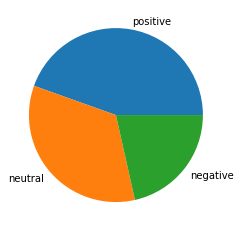

In [ ]:
s = [2732,2084,1318]

plt.pie(s, labels = ['positive', 'neutral', 'negative'])
plt.show


## **2.2 Textblob on preprocessed tweets**

In [ ]:
from textblob import TextBlob

In [ ]:
def Tweet_TextBlob_Analaysis(tweet) : 
  subjectivity = TextBlob(tweet).sentiment.subjectivity
  polarity = TextBlob(tweet).sentiment.polarity
  return subjectivity, polarity

In [ ]:
def Textblob_Sentiment_Anlaysis(treshold): 

  start = time.time()
  textblob_df = pd.DataFrame(data = {'Tweet' : preprocessed_tweets})
  textblob_df['Subjectivity'] = textblob_df['Tweet'].apply(lambda x : Tweet_TextBlob_Analaysis(x)[0])
  textblob_df['Polarity'] = textblob_df['Tweet'].apply(lambda x : Tweet_TextBlob_Analaysis(x)[1])
  textblob_df['Sentiment'] = textblob_df['Polarity'].apply(lambda x : Classify(x, treshold))

  summary = textblob_df.groupby('Sentiment').count()['Tweet']
  print('Time taken to classify {} tweets : {} sec\n'.format(len(preprocessed_tweets),time.time() - start))

  return textblob_df , summary




In [ ]:
df, s = Textblob_Sentiment_Anlaysis(0.1)
print(s)
df.head()

Time taken to classify 6134 tweets : 13.547977685928345 sec

Sentiment
Negative     546
Neutral     3920
Positive    1668
Name: Tweet, dtype: int64


,Tweet,Subjectivity,Polarity,Sentiment
0,MorganStanley might want quit promoting REALL...,0.388889,-0.233333,Negative
1,"According MorganStanley, historic initial job...",0.000000,0.000000,Neutral
2,realdonaldtrump morganstanley Please tell eve...,0.000000,0.000000,Neutral
3,realdonaldtrump morganstanley Where's Money? ...,0.000000,0.000000,Neutral
4,realdonaldtrump morganstanley You're really g...,0.450000,-0.100000,Neutral


## **2.3 Flair on preprocessed tweets**

In [ ]:
import flair
from flair.models import TextClassifier
from flair.data import Sentence

In [ ]:
flair_sentiment = TextClassifier.load('en-sentiment')

2020-06-09 15:38:41,530 loading file /root/.flair/models/sentiment-en-mix-distillbert.pt


In [ ]:
def flair_scores_to_strings(flair_scores):
  a = np.array(flair_scores)
  scores_string = []
  for i in range(len(a)) :
    scores_string.append(str(a[i])) 
  return scores_string




def clean_strings(scores_string): 
  Positive_indices = []
  Positive_scores = []
  Negative_indices =[]
  Negative_scores = [] 

  for i in range(len(scores_string)) :
    if re.match('\\[N', scores_string[i]):
      k = re.sub(r'[\[NEGATIVE (]', "",scores_string[i]).strip()
      k = re.sub(r'\)]$', '', k).strip()
      Negative_indices.append(i)
      Negative_scores.append(float(k))

    if re.match('\\[P', scores_string[i]):
      k = re.sub(r'[\[POSITIVE (]', "",scores_string[i]).strip()
      k = re.sub(r'\)]$', '', k).strip()
      Positive_indices.append(i)
      Positive_scores.append(float(k))

  print(len(Positive_scores))
  print(len(Negative_scores))
  return Positive_indices, Positive_scores, Negative_indices, Negative_scores



def generate_flair_sentiments(Positive_indices, Positive_scores, Negative_indices, Negative_scores, treshold) :
  Sentiment_score = []
  Sentiment_index = []
  Sentiment_type = []

  for i in range(len(Positive_scores)): 
    Sentiment_index.append(Positive_indices[i])
    Sentiment_score.append(Positive_scores[i])
    if Positive_scores[i]> treshold : 
      Sentiment_type.append('Positive')
    else : 
      Sentiment_type.append('Neutral')

  for i in range(len(Negative_scores)): 
    Sentiment_score.append(- Negative_scores[i])
    Sentiment_index.append(Negative_indices[i])
    if Negative_scores[i]> treshold : 
      Sentiment_type.append('Negative')
    else : 
      Sentiment_type.append('Neutral')

  Sentiment_analysis_flair = pd.DataFrame({'Type': Sentiment_type, 'Score' : Sentiment_score}, index = Sentiment_index).sort_index()

  return Sentiment_analysis_flair



In [ ]:
def Flair_sentiment_analysis(treshold) : 

  start = time.time()
  scores_flair = []
  for x in preprocessed_tweets : 
    s = Sentence(x)
    flair_sentiment.predict(s)
    general_sentiment = s.labels
    scores_flair.append(general_sentiment)

  scores_string = flair_scores_to_strings(scores_flair)
  Positive_indices, Positive_scores, Negative_indices, Negative_scores = clean_strings(scores_string)
  Sentiment_analysis_flair= generate_flair_sentiments(Positive_indices, Positive_scores, Negative_indices, Negative_scores, treshold)

  print('Time taken to classify 10,000 tweets : {} sec\n'.format(time.time() - start))

  return Sentiment_analysis_flair







In [ ]:
data = Flair_sentiment_analysis(0.95)

3236
2898
Time taken to classify 10,000 tweets : 774.7062406539917 sec



## **2.4 Comparison of the methods**

In [ ]:
def assign_binary(sentiment) : 
  if sentiment == 'Positive': 
    return 1
  elif sentiment == 'Negative' :
    return -1
  else : 
    return 0

In [ ]:
def results_summary (df_textblob, df_nlkt, df_flair):

  comparative_df = pd.DataFrame(data = {'Tweet' : preprocessed_tweets})

  comparative_df['Textblob Score'] = df_textblob['Polarity']
  comparative_df['Textblob Sentiment'] = df_textblob['Sentiment']

  comparative_df['NLTK Score'] = df_nlkt['Compound']
  comparative_df['NLTK Sentiment'] = df_nlkt['Sentiment']


  comparative_df['Flair Score'] = df_flair['Score']
  comparative_df['Flair Sentiment'] = df_flair['Type']

  comparative_df['Textblob'] = comparative_df['Textblob Sentiment'].apply(lambda x :assign_binary(x))
  comparative_df['NLTK'] = comparative_df['NLTK Sentiment'].apply(lambda x :assign_binary(x))
  comparative_df['Flair'] = comparative_df['Flair Sentiment'].apply(lambda x :assign_binary(x))

  return comparative_df

In [ ]:
df_textblob = Textblob_Sentiment_Anlaysis(0.1)[0]
df_nltk = vader_sentiment_analysis(0.2)[0]

comparative_df = results_summary(df_textblob, df_nltk, data)

Time taken to classify 6134 tweets : 13.410462617874146 sec

Time taken to classify 6134 tweets : 1.5802819728851318 sec



In [ ]:
# unique values 
s1 = pd.value_counts(comparative_df['Textblob']).sort_index().values
s2 = pd.value_counts(comparative_df['NLTK']).sort_index().values
s3 = pd.value_counts(comparative_df['Flair']).sort_index().values

unique_summary = pd.DataFrame({'Textblob' :s1,'NLTK': s2,'Flair' : s3}, index = [-1,0,1])
unique_summary.head()

,Textblob,NLTK,Flair
-1,546,1117,1798
0,3920,2803,2478
1,1668,2214,1858


In [ ]:
# nltk vs textblob comparison
nltk_vs_textblob = comparative_df.groupby(['Textblob', 'NLTK']).count()['Tweet']
nltk_vs_textblob = pd.DataFrame(nltk_vs_textblob).unstack()
nltk_vs_textblob

Tweet            
NLTK        -1     0     1
Textblob                  
-1         305   148    93
 0         615  2343   962
 1         197   312  1159

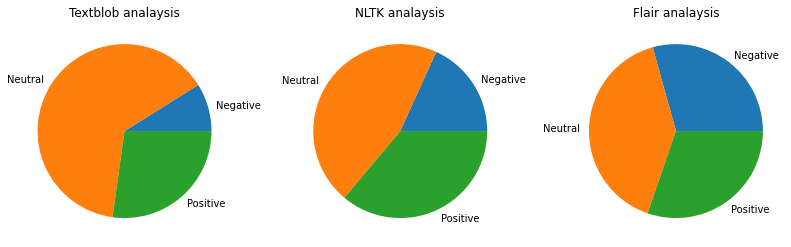

In [ ]:
figure = plt.figure(figsize = (14,4))
plt.subplot(1,3,1)
plt.pie(unique_summary['Textblob'], labels = ['Negative', 'Neutral', 'Positive'])
plt.title('Textblob analaysis')
plt.subplot(1,3,2)
plt.pie(unique_summary['NLTK'], labels = ['Negative', 'Neutral', 'Positive'])
plt.title('NLTK analaysis')
plt.subplot(1,3,3)
plt.pie(unique_summary['Flair'], labels = ['Negative', 'Neutral', 'Positive'])
plt.title('Flair analaysis')
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


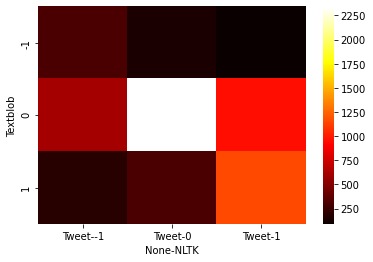

In [ ]:
import seaborn as sbn
sbn.heatmap(nltk_vs_textblob, cmap = 'hot')